In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

plt.style.use('default')

In [43]:
action_dict = {"A1": "drink water"
                , "A2": "eat meal/snack"
                , "A3": "brushing teeth"
                , "A4": "brushing hair"
                , "A5": "drop"
                , "A6": "pickup "
                , "A7": "throw "
                , "A8": "sitting down "
                , "A9": "standing up (from sitting position)"
                , "A10": "clapping"
                , "A11": "reading"
                , "A12": "writing"
                , "A13": "tear up paper"
                , "A14": "wear jacket"
                , "A15": "take off jacket"
                , "A16": "wear a shoe"
                , "A17": "take off a shoe"
                , "A18": "wear on glasses"
                , "A19": "take off glasses"
                , "A20": "put on a hat/cap"
                , "A21": "take off a hat/cap"
                , "A22": "cheer up"
                , "A23": "hand waving"
                , "A24": "kicking something"
                , "A25": "reach into pocket"
                , "A26": "hopping (one foot jumping)"
                , "A27": "jump up"
                , "A28": "make a phone call/answer phone"
                , "A29": "playing with phone/tablet"
                , "A30": "typing on a keyboard"
                , "A31": "pointing to something with finger"
                , "A32": "taking a selfie"
                , "A33": "check time (from watch)"
                , "A34": "rub two hands together"
                , "A35": "nod head/bow"
                , "A36": "shake head"
                , "A37": "wipe face"
                , "A38": "salute"
                , "A39": "put the palms together"
                , "A40": "cross hands in front (say stop)"
                , "A41": "sneeze/cough"
                , "A42": "staggering"
                , "A43": "falling"
                , "A44": "touch head (headache)"
                , "A45": "touch chest (stomachache/heart pain)"
                , "A46": "touch back (backache)"
                , "A47": "touch neck (neckache)"
                , "A48": "nausea or vomiting condition"
                , "A49": "use a fan (with hand or paper)/feeling warm"
                , "A50": "punching/slapping other person"
                , "A51": "kicking other person"
                , "A52": "pushing other person"
                , "A53": "pat on back of other person"
                , "A54": "point finger at the other person"
                , "A55": "hugging other person"
                , "A56": "giving something to other person"
                , "A57": "touch other person's pocket"
                , "A58": "handshaking"
                , "A59": "walking towards each other"
                , "A60": "walking apart from each other"
                    }

medical_actions = ["A41", "A42", "A43", "A44", "A45", "A46", "A47", "A48", "A49"]
social_actions = ["A50", "A51", "A52", "A53", "A54", "A55", "A56", "A57", "A58", "A59", "A60"]
single_actions = [x for x in action_dict.keys() if x not in social_actions]

"""1-base of the spine 2-middle of the spine
3-neck 4-head 5-left shoulder 6-left elbow 7-left wrist 8-
left hand 9-right shoulder 10-right elbow 11-right wrist 12-
right hand 13-left hip 14-left knee 15-left ankle 16-left foot 17-
right hip 18-right knee 19-right ankle 20-right foot 21-spine 22-
tip of the left hand 23-left thumb 24-tip of the right hand 25-
right thumb
"""
keypoints = ["base of the spine", "middle of the spine", "neck", "head", "left shoulder", "left elbow", "left wrist", "left hand", "right shoulder", "right elbow", "right wrist",  "right hand", "left hip", "left knee",
             "left ankle", "left foot", "right hip", "right knee", "right ankle", "right foot", "spine",
             "tip of the left hand", "left thumb", "tip of the right hand", "right thumb"]

In [44]:
# Load data
base_folder = r"E:\asoid_paper\NTU_RGBD60\social"
base_name = "social_3d"
model_folder = "models"
n_seeds = 3
#find all directories in model_folder
iterations = os.listdir(os.path.join(base_folder, model_folder, "active"))

n_iter = len(iterations)
print("Number of iterations: ", n_iter)

Number of iterations:  39


In [45]:
#load traincount if exists

with open(os.path.join(base_folder, f'{model_folder}/benchmark/active_traincount.pkl'), 'rb') as f:
    class_counts_per = pickle.load(f)

#unbalanced
with open(os.path.join(base_folder, f'{model_folder}/benchmark/unbalanced_traincount.pkl'), 'rb') as f:
    class_counts_total = pickle.load(f)

print("Class counts per iteration: ", class_counts_per)
print("Class counts total: ", class_counts_total)

Class counts per iteration:  [[  81.66666667   92.           90.          107.66666667   75.33333333
    94.66666667   99.          138.33333333   98.          111.66666667
   125.66666667]
 [ 148.33333333  151.33333333  161.66666667  180.66666667  137.
   168.          172.66666667  233.33333333  177.66666667  180.
   203.33333333]
 [ 210.          217.          224.66666667  256.66666667  200.33333333
   238.          247.33333333  337.          256.66666667  245.
   281.33333333]
 [ 281.66666667  278.          293.66666667  333.          258.
   304.33333333  326.          434.33333333  340.          310.66666667
   354.33333333]
 [ 348.          338.66666667  373.          405.66666667  320.
   357.33333333  408.66666667  552.66666667  409.33333333  369.33333333
   431.33333333]
 [ 416.66666667  399.          441.33333333  482.          377.
   424.          498.33333333  662.33333333  481.66666667  428.66666667
   503.        ]
 [ 488.          461.          509.66666667  568.6666

In [46]:

# get f1 scores from benchmark

bench_auto_path = os.path.join(base_folder,"models/benchmark/activelearning_performance.pkl")
with open(bench_auto_path, 'rb') as f:
    iterX_f1_scores_list = pickle.load(f)
    
bench_unbal_path = os.path.join(base_folder,"models/benchmark/unbalanced_performance.pkl")
with open(bench_unbal_path, 'rb') as f:
    unbal_f1_scores_list = pickle.load(f)
    
    

    

In [47]:
iterX_f1_scores_list = np.array(iterX_f1_scores_list)
unbal_f1_scores_list = np.array(unbal_f1_scores_list)
iterX_f1_scores_list.shape, unbal_f1_scores_list.shape

((39, 3, 11), (3, 11))

In [50]:
limit_iter = 35 # limit iterations to plot

class_counts_per = class_counts_per[:limit_iter]
iterX_f1_scores_list = iterX_f1_scores_list[:limit_iter]
unbal_f1_scores_list = unbal_f1_scores_list[:limit_iter]


In [60]:
#get cmap for behavioral types from Y_train
cmap_beh = sns.color_palette("tab10", unbal_f1_scores_list.shape[1])

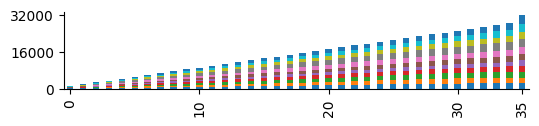

In [63]:
## plot counts
fig, ax = plt.subplots(1, 1, figsize=(6, 1))
# df
df = pd.DataFrame(np.vstack((np.array(class_counts_per), np.array(class_counts_total))))
df.plot(kind='bar', stacked=True, legend=False
        , color=cmap_beh
        , ax=ax)
#ax.set_xticklabels('')
#ax.set_yticklabels('')
ax.set_xticks(np.hstack((np.arange(0, class_counts_per.shape[0], 10), class_counts_per.shape[0])))
ax.set_yticks(np.linspace(0, round(np.sum(class_counts_total), -3), 3))

# plt.gca().invert_xaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(False)

#save fig
plt.savefig(os.path.join(base_folder, f'{model_folder}/benchmark/training_size_all.svg'), dpi=300, bbox_inches='tight')
plt.show()

plt.show()

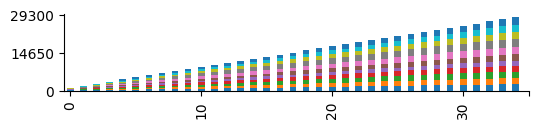

In [64]:
## plot counts
fig, ax = plt.subplots(1, 1, figsize=(6, 1))


df = pd.DataFrame(np.array(class_counts_per))
# df
df.plot(kind='bar', stacked=True, legend=False
        , color=cmap_beh
        , ax=ax)

ax.set_xticks(np.hstack((np.arange(0, class_counts_per.shape[0], 10), class_counts_per.shape[0])))
ax.set_yticks(np.linspace(0, round(np.sum(class_counts_per[-1]) + 1000, -2), 3))

# plt.gca().invert_xaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#save fig
plt.savefig(os.path.join(base_folder, f'{model_folder}/benchmark/training_size_active.svg'), dpi=300, bbox_inches='tight')
plt.show()
plt.show()

In [65]:
f1_ = []
macro_avg_ = []
for j in range(len(iterX_f1_scores_list)):
    f1_.append(np.array(iterX_f1_scores_list[j]))
    macro_avg_.append(np.mean(iterX_f1_scores_list[j], axis=1))
    
peak_f1_scores = unbal_f1_scores_list
peak_macro_scores = np.mean(unbal_f1_scores_list, axis=1)


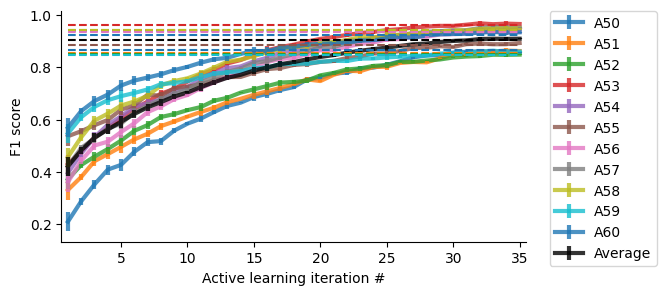

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
# cmap_abeh = cmap[:-1]

for b in range(len(cmap_beh)):
    x = np.arange(len(f1_))
    y = np.mean(f1_, axis=1)[:, b]
    #     sem = np.std(f1_, axis=1)[:, b]/np.sqrt(len(f1_))
    y_err = np.std(macro_avg_, axis=1)
    #     ax.plot(y, color=cmap_beh[b])
    #     ax.fill_between(x, y-sem, y+sem, fc=cmap_beh[b], alpha=0.5)
    ax.errorbar(x, y, yerr=3*y_err, barsabove=True, lw=3,
                color=cmap_beh[b], ecolor=cmap_beh[b], alpha=0.8, elinewidth=3, label=social_actions[b])

x_all = np.arange(len(macro_avg_))
y_all = np.mean(macro_avg_, axis=1)
# sem_all = np.std(macro_avg_, axis=1)/np.sqrt(len(macro_avg_))
std_all = np.std(macro_avg_, axis=1)
# ax.plot(y_all, c='k')
# ax.fill_between(x_all, y_all-sem_all, y_all+sem_all, fc='k', alpha=0.5)
plot, caps, bar = ax.errorbar(x_all, y_all, yerr=3*std_all, barsabove=True, lw=3,
                              color='k', ecolor='k', alpha=0.8, elinewidth=3
                              , label='Average')

ax.set_xticks(np.arange(4, len(macro_avg_), 5))
ax.set_xticklabels(np.arange(5, len(macro_avg_) + 1, 5))
ax.set_ylabel('F1 score')
ax.set_xlabel('Active learning iteration #')
# ax.set_yticks(np.arange(0.5, 1.01, 0.1))
#ax.set_ylim([0.6, 0.9])

ax.hlines(np.mean(peak_macro_scores, axis=0), 0, len(macro_avg_) - 1, ls='--', color='k')
for b in range(len(cmap_beh)):
    #     ax.fill_between(np.arange(len(macro_avg_)),
    #                     np.min(peak_f1_scores, axis=0)[b],
    #                     np.max(peak_f1_scores, axis=0)[b], alpha=0.2, color=cmap_beh[b])
    ax.hlines(np.mean(peak_f1_scores, axis=0)[b], 0, len(macro_avg_) - 1, ls='--', color=cmap_beh[b])
ax.set_xlim([-.5, len(macro_avg_) - .5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#remove grid
ax.grid(False)

#save fig
plt.savefig(os.path.join(base_folder, f'{model_folder}/benchmark/performance_per_iter.svg'), dpi=300, bbox_inches='tight')

plt.show()


## Performance per class (last iteration)

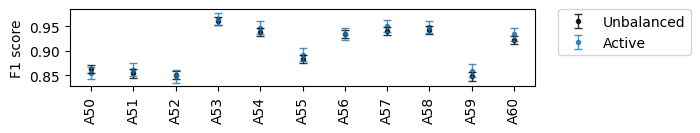

In [88]:
#show f1 scores for each class of last iteration

fig, ax = plt.subplots(1, 1, figsize=(6, 1))
# cmap_beh = cmap[:-1]

last_iter_f1 = iterX_f1_scores_list[-1]

y_all = np.mean(last_iter_f1, axis=0)
x_all = np.arange(len(y_all))
# sem_all = np.std(macro_avg_, axis=1)/np.sqrt(len(macro_avg_))
std_all = np.std(last_iter_f1, axis=0)

# ax.plot(y_all, c='k')
# ax.fill_between(x_all, y_all-sem_all, y_all+sem_all, fc='k', alpha=0.5)
#plot each class separately


#plot corresponding class in unbalanced as errorbar
ax.errorbar(x_all, np.mean(peak_f1_scores, axis=0)
                          , marker = "o", markersize=3
                          ,yerr=3*np.std(peak_f1_scores, axis=0)[b], barsabove=True, lw=0
                        #,ecolor='k'
                        , elinewidth=1, capsize=3
                        , color = 'k'
                        #,ls='none'
                          #color=cmap_beh[b], ecolor=cmap_beh[b]
                         ,alpha=0.8, label = "Unbalanced")

plot, caps, bar = ax.errorbar(x_all, y_all
                          , marker = "o", markersize=3
                          ,yerr=3*std_all[b], barsabove=True, lw=0
                        #,ecolor='k'
                              , elinewidth=1, capsize=3
                        #,ls='none'
                          #color=cmap_beh[b], ecolor=cmap_beh[b]
                         ,alpha=0.8, label = "Active")

ax.set_ylabel('F1 score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xticks(np.arange(len(y_all)))
ax.set_xticklabels(social_actions, rotation=90)
ax.grid(False)
#save fig
plt.savefig(os.path.join(base_folder, f'{model_folder}/benchmark/performance_last_iter.svg'), dpi=300, bbox_inches='tight')

plt.show()


# Confusion matrix

In [68]:
#load last iteration model
last_iter_targets =[]
for j in range(n_seeds):
    with open(os.path.join(base_folder, f'{model_folder}/active/iter{limit_iter}/model_seed{j}.pkl'), 'rb') as f:
        _, _, Y_train_iter1, predict_iter1 = pickle.load(f)
    last_iter_targets.append(predict_iter1)
last_iter_targets = np.array(last_iter_targets)
print(last_iter_targets.shape)

#same for unbalanced

unbalanced_targets =[]

for j in range(n_seeds):
    with open(os.path.join(base_folder, f'{model_folder}/unbalanced/model_seed{j}.pkl'), 'rb') as f:
        _, _, Y_train_iter1, predict_iter1 = pickle.load(f)
    unbalanced_targets.append(predict_iter1)
unbalanced_targets = np.array(unbalanced_targets)
print(unbalanced_targets.shape)



(3, 7946)
(3, 7946)


In [74]:
with open(os.path.join(base_folder,f"processed_data/train_test_split_{base_name}.pkl"), 'rb') as fr:
    [X_train, X_test, y_train, y_test] = pickle.load(fr)
    
print(f'X_train shape: {X_train.shape}', f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}', f'y_test shape: {len(y_test)}')

X_train shape: (31783, 2500) X_test shape: (7946, 2500)
y_train shape: (31783,) y_test shape: 7946


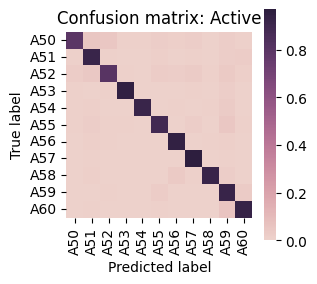

In [84]:
#confusion matrix for last iteration

from sklearn.metrics import confusion_matrix


conf_matr = confusion_matrix(y_test, last_iter_targets[0])
conf_matr = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]

#plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.heatmap(conf_matr
            #, annot=True
            , ax=ax
            , cmap=sns.cubehelix_palette(as_cmap=True)
            , fmt='.2f', square=True)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix: Active')
ax.set_xticklabels(social_actions, rotation=90)
ax.set_yticklabels(social_actions, rotation=0)

#save fig
plt.savefig(os.path.join(base_folder, f'{model_folder}/benchmark/active_confusion_matrix.svg'), dpi=300, bbox_inches='tight')
plt.show()

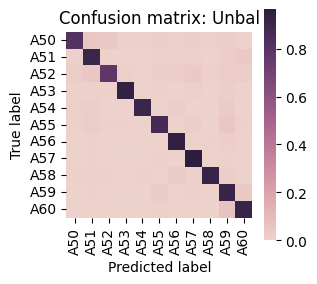

In [80]:
#confusion matrix for last iteration

from sklearn.metrics import confusion_matrix


conf_matr = confusion_matrix(y_test, unbalanced_targets[0])
conf_matr = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]

#plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.heatmap(conf_matr
            #, annot=True
            , ax=ax
            , cmap=sns.cubehelix_palette(as_cmap=True)
            , fmt='.2f', square=True)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion matrix: Unbal')
ax.set_xticklabels(social_actions, rotation=90)
ax.set_yticklabels(social_actions, rotation=0)

#save fig
plt.savefig(os.path.join(base_folder, f'{model_folder}/benchmark/unbal_confusion_matrix.svg'), dpi=300, bbox_inches='tight')
plt.show()

In [91]:
# create table of training samples per class and iteration
df = pd.DataFrame(np.array(class_counts_per), columns=social_actions)

df

,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
0,81.666667,92.000000,90.000000,107.666667,75.333333,94.666667,99.000000,138.333333,98.000000,111.666667,125.666667
1,148.333333,151.333333,161.666667,180.666667,137.000000,168.000000,172.666667,233.333333,177.666667,180.000000,203.333333
2,210.000000,217.000000,224.666667,256.666667,200.333333,238.000000,247.333333,337.000000,256.666667,245.000000,281.333333
3,281.666667,278.000000,293.666667,333.000000,258.000000,304.333333,326.000000,434.333333,340.000000,310.666667,354.333333
4,348.000000,338.666667,373.000000,405.666667,320.000000,357.333333,408.666667,552.666667,409.333333,369.333333,431.333333
5,416.666667,399.000000,441.333333,482.000000,377.000000,424.000000,498.333333,662.333333,481.666667,428.666667,503.000000
6,488.000000,461.000000,509.666667,568.666667,430.333333,494.000000,583.000000,759.000000,558.666667,492.000000,569.666667
7,552.333333,528.666667,586.333333,638.000000,484.000000,555.000000,668.333333,858.666667,634.666667,554.666667,653.333333
8,622.000000,607.000000,658.333333,704.666667,538.333333,619.000000,747.666667,968.333333,703.333333,624.666667,720.666667
9,691.000000,670.000000,732.000000,774.666667,599.000000,683.333333,826.333333,1082.333333,779.666667,679.333333,796.333333
